In [1]:
import glob
import os
from utils import  test_pred
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import read_pred_file, test_pred

In [2]:
imgs = glob.glob("Data/Val_DS/images/*")
imgs.sort()
pred_folders = glob.glob("Data/preds/Val*/labels")
pred_folders.sort()
len(pred_folders), len(imgs)

(5, 1762)

In [3]:
conf_th = 0.2

nb_fp = {}
nb_tp = {}
nb_fn = {}
for pred_folder in pred_folders:
    nb_fp[pred_folder.split('/')[-2]] = 0
    nb_tp[pred_folder.split('/')[-2]] = 0
    nb_fn[pred_folder.split('/')[-2]] = 0
    
for file in imgs:
    label_file = file.replace("images","labels").replace('.jpg','.txt')
    labels = read_pred_file(label_file)
    for pred_folder in pred_folders:
        pred_file = os.path.join(pred_folder, os.path.basename(label_file))
        preds = read_pred_file(pred_file)
        fp, tp, fn = test_pred(labels, preds, conf_th)
     
        nb_fp[pred_folder.split('/')[-2]] += fp
        nb_tp[pred_folder.split('/')[-2]] += tp
        nb_fn[pred_folder.split('/')[-2]] += fn

In [4]:
df = pd.DataFrame()
models = []
tp_s = []
fp_s = []
fn_s = []
precision =  []
recall = []
for k,v in nb_fp.items():
    models.append(k.split('_')[-1])
    fp_s.append(nb_fp[k])
    tp_s.append(nb_tp[k])
    fn_s.append(nb_fn[k])
    precision.append((nb_tp[k])/(nb_tp[k] + nb_fp[k] + 1e-12))
    recall.append((nb_tp[k])/(nb_tp[k] + nb_fn[k] + 1e-12))


df["model"]=models
df["tp"]=tp_s
df["fn"]=fn_s
df["fp"]=fp_s
df["precesion"] = precision
df["recall"] = recall
precision = np.array(precision)
recall = np.array(recall)
f1 = 2*precision*recall / (precision + recall)
df["f1"] = f1
df.sort_values('f1')

,model,tp,fn,fp,precesion,recall,f1
0,celestial-armadillo-11,1106,436,71,0.939677,0.717250,0.813534
2,legendary-field-19,1183,361,45,0.963355,0.766192,0.853535
4,usual-shadow-24,1192,351,42,0.965964,0.772521,0.858480
1,jolly-brook-22,1227,318,50,0.960846,0.794175,0.869596
3,northern-mountain-21,1234,306,58,0.955108,0.801299,0.871469


In [5]:
precision =  {}
recall = {}
f1 = {}

for conf_th in range(20):
    conf_th/=20
    nb_fp = {}
    nb_tp = {}
    nb_fn = {}
    for pred_folder in pred_folders:
        nb_fp[pred_folder.split('/')[-2]] = 0
        nb_tp[pred_folder.split('/')[-2]] = 0
        nb_fn[pred_folder.split('/')[-2]] = 0
        
    for file in imgs:
        label_file = file.replace("images","labels").replace('.jpg','.txt')
        labels = read_pred_file(label_file)
        for pred_folder in pred_folders:
            pred_file = os.path.join(pred_folder, os.path.basename(label_file))
            preds = read_pred_file(pred_file)
            fp, tp, fn = test_pred(labels, preds, conf_th)
        
            nb_fp[pred_folder.split('/')[-2]] += fp
            nb_tp[pred_folder.split('/')[-2]] += tp
            nb_fn[pred_folder.split('/')[-2]] += fn


    for k,v in nb_fp.items():
        model = k.split('_')[-1]
        if not k in precision.keys():
            precision[k] = []
            recall[k] = []
            f1[k] = []
    
        precision[k].append((nb_tp[k]+ 1e-12)/(nb_tp[k] + nb_fp[k] + 1e-12))
        recall[k].append((nb_tp[k])/(nb_tp[k] + nb_fn[k] + 1e-12))
        f1[k].append(2*precision[k][-1]*recall[k][-1] / (precision[k][-1] + recall[k][-1]+ 1e-12))

Text(0.5, 1.0, 'F1 curve')

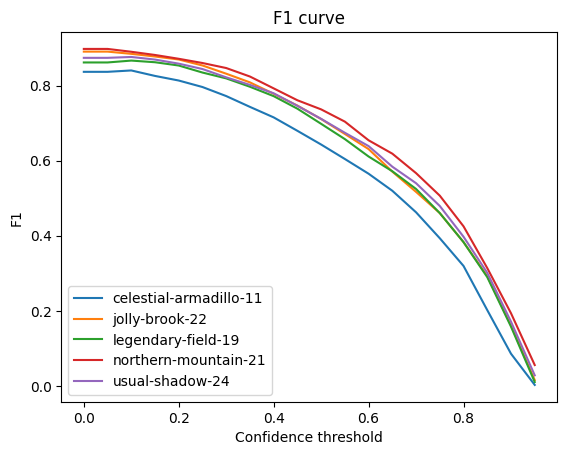

In [6]:
x = [i/20 for i in range(20)]

for k,v in nb_fp.items():
 plt.plot(x, f1[k], label=k.split('_')[-1])

plt.legend()
plt.xlabel('Confidence threshold')
plt.ylabel('F1')
plt.title('F1 curve')

Text(0.5, 1.0, 'Precision curve')

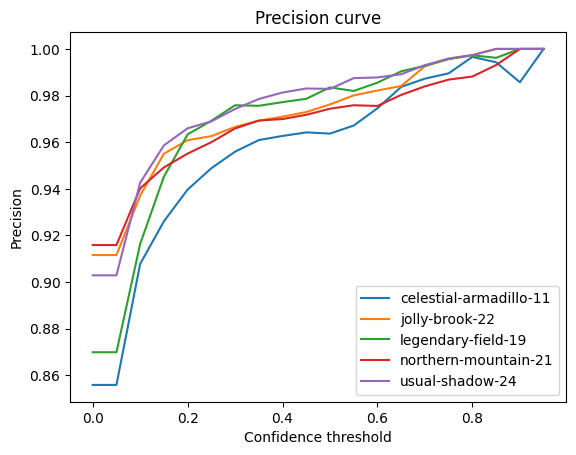

In [7]:
for k,v in nb_fp.items():
 plt.plot(x, precision[k], label=k.split('_')[-1])

plt.legend()
plt.xlabel('Confidence threshold')
plt.ylabel('Precision')
plt.title('Precision curve')

Text(0.5, 1.0, 'Recall curve')

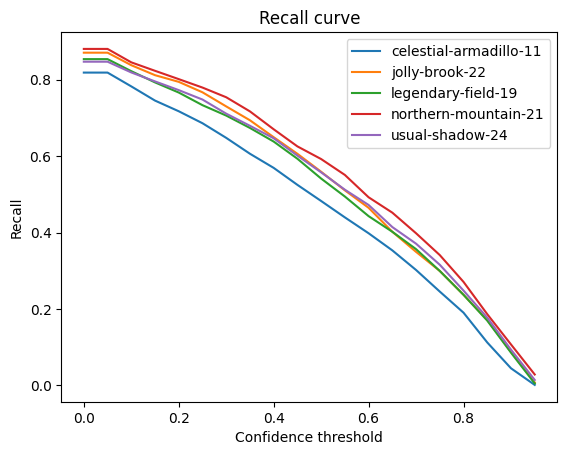

In [8]:
for k,v in nb_fp.items():
 plt.plot(x, recall[k], label=k.split('_')[-1])

plt.legend()
plt.xlabel('Confidence threshold')
plt.ylabel('Recall')
plt.title('Recall curve')